
# Project: Investigate a Dataset - No show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

No show appointments is a medical dataset from Brazil collected in 2016 that contains over a hundred thousand samples of whether a patient didn't show up for an appointment or not. It also contains features such as the patient's age, gender, schedule details and health status.  
The following are the columns in the dataset and its characteristics:  
1. **PatientId** - Patient identification  
2. **AppointmentID** - Appointment identification  
3. **Gender** - Male or Female  
4. **ScheduledDay** - Date appointment was set up  
5. **AppointmentDay** - Date appointment was to be made  
6. **Age** - Patient's age  
7. **Neighbourhood** - Where appointment takes place  
8. **Scholarship** - True(0) or False(1)  
9. **Hipertension** - True(0) or False(1)  
10. **Diabetes** - True(0) or False(1)  
11. **Alcoholism** - True(0) or False(1)  
12. **Handcap** - True(0) or False(1)  
13. **SMS_received** - True(0) or False(1)  
14. **No-show** - Yes(meaning the patient didn't show up) or No(meaning the patient showed up)  



### Question(s) for Analysis

1. Is there any relationship between Age and No_show appointment?  
2. What is the appointment show up in terms of gender?
3. Does receiving SMS affect appointment show up?


In [5]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [6]:
# loading data
df = pd.read_csv('data\\noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# data description
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the Age column in the data there seems to be a value of **-1** which is not possible.

In [8]:
# checking for column types and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing values from any column.

In [9]:
# data rows and columns
df.shape

(110527, 14)

The data has **110527** rows (samples) and **14** columns.

In [10]:
# checking for duplicates
df.duplicated().sum()

0

The data has no duplicate samples.

In [11]:
# checking for unique values in the columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


### Data Cleaning

In [12]:
# changing last column label to match the rest
df.rename(columns={'No-show': 'No_show'}, inplace=True)

# veiwing the changes
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [13]:
# Droping the columns that are not necessary
columns = ['PatientId', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
df.drop(columns, axis=1, inplace=True)

# viewing the dataframe
df.head(1)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,SMS_received,No_show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,No


In [14]:
# Changing the date data types to the correct format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Confirming the changes
df.dtypes

AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
SMS_received                    int64
No_show                        object
dtype: object

In [15]:
# Removing the samples with Age -1
wrong_age = df.query('Age == -1')
df.drop(wrong_age.index, axis=0, inplace=True)

# Checking the minimum age now
df.Age.min()

0

The data is already cleaned and ready for exploration.

<a id='eda'></a>
## Exploratory Data Analysis


In [16]:
# proportional function to help work out proportons quickly
def prop(x):
    '''Takes a value and returns a proportion of the value against the total samples.
    
    Args: 
        x: an integer or a float value.
        
    Returns:
        An integer or float proportion.
    '''
    proportion = x / df.shape[0]
    return proportion

In [17]:
# patients who attended / didn't attend the appointment
df.No_show.value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

Patients who showed up for the appointnment are **88207** against **22319** who did not.

In [18]:
# proportion of patients who attended the appointment
prop(88207)

0.7980656135208005

In [19]:
# proportion of patients who did not attend the appointment
prop(22319)

0.20193438647919945

The proportion of patients who showed up for the appointment is **0.7981**

### Research Question 1: Is there any relationship between Age and No_show appointment? 

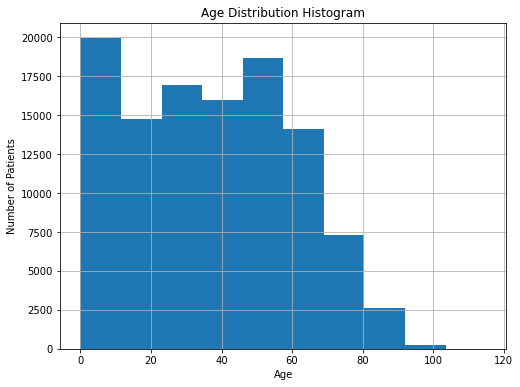

In [20]:
# Age distribution
df.Age.hist(figsize=(8, 6));
plt.xlabel('Age');
plt.ylabel('Number of Patients');
plt.title('Age Distribution Histogram');

The Age distribution is skewed to the right.

In [21]:
# placing age into age groups
Levels = [0, 14, 24, 64, 115]
Names = ['Child', 'Youth', 'Adult', 'Senior']
df['Age_group'] = pd.cut(df['Age'], Levels, labels=Names)

In [22]:
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,SMS_received,No_show,Age_group
0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,No,Adult
1,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,No,Adult
2,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,No,Adult
3,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,No,Child
4,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,No,Adult


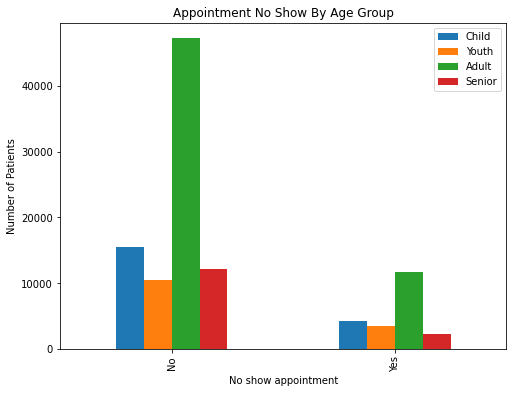

In [23]:
# checking the appointment show up by Age groups
df.groupby('Age_group').No_show.value_counts().unstack(0).plot(kind='bar', figsize=(8, 6))
plt.title('Appointment No Show By Age Group')
plt.xlabel('No show appointment')
plt.ylabel('Number of Patients')
plt.legend();

Adults are the largest group showed up for the appointment. Youth were the minority.

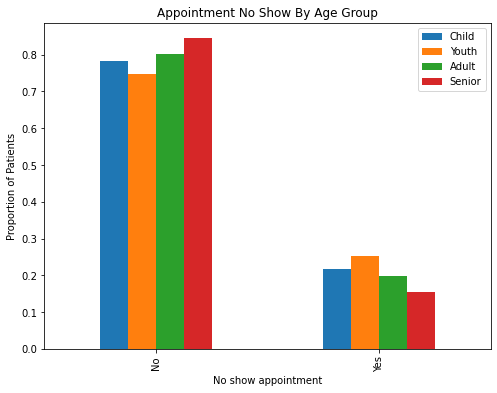

In [24]:
# checking the proportonal rate for appointment show up
df.groupby('Age_group')['No_show'].value_counts(normalize=True).unstack(0).plot(kind='bar', figsize=(8, 6))
plt.title('Appointment No Show By Age Group')
plt.xlabel('No show appointment')
plt.ylabel('Proportion of Patients')
plt.legend();

All age groups seem to have a higher rate of appointment show up. It is not clear though that age is related to no show.

### Research Question 2:  What is the appointment show up in terms of gender?

In [25]:
# getting the values of No_show by Gender
df.groupby('Gender')['No_show'].value_counts()

Gender  No_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

In [26]:
# propotion of females who showed up for appointment
prop(57245)

0.5179324321879015

In [27]:
# propotion of males who showed up for appointment
prop(30962)

0.28013318133289905

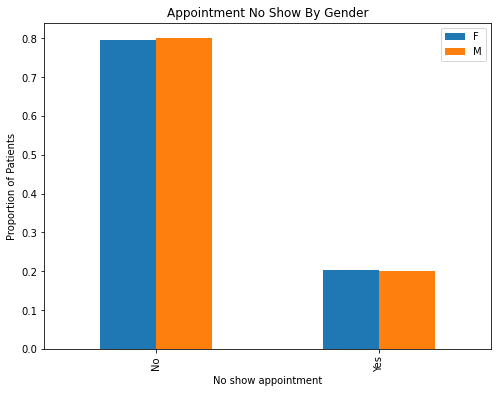

In [28]:
# proportion for no show by gender
df.groupby('Gender')['No_show'].value_counts(normalize=True).unstack(0).plot(kind='bar', figsize=(8, 6))
plt.title('Appointment No Show By Gender')
plt.xlabel('No show appointment')
plt.ylabel('Proportion of Patients')
plt.legend();

Each gender had a high proportion of persons who showed up for the appointment.



### Research Question 3:  Does receiving SMS affect appointment show up?

In [29]:
# checking how many people received or didn't receive SMS
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

**35482** people received SMS against **75044** who didn't.

In [30]:
# proportion of people who received SMS
prop(35482)

0.3210285362720084

The proportion of people who received SMS is **0.3210**.

In [31]:
# getting appointment show up by SMS received
df.groupby('SMS_received')['No_show'].value_counts()

SMS_received  No_show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: No_show, dtype: int64

In [32]:
# proportion of SMS received and showed up
prop(25698)

0.23250637858965312

In [33]:
# proportion of SMS received and not showed up
prop(9784)

0.08852215768235529

In [34]:
# proportion of SMS not received and showed up
prop(62509)

0.5655592349311475

In [35]:
# proportion of SMS not received and not showed up
prop(12535)

0.11341222879684418

It seems that receiving SMS has no relationship with attendance.  
The persons that didn't receive SMS and showed up had the highest proportion ie **0.5656**.

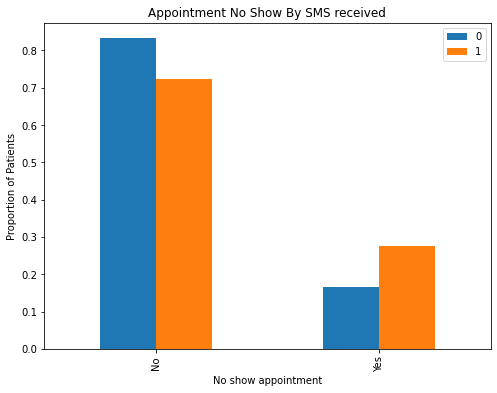

In [36]:
df.groupby('SMS_received')['No_show'].value_counts(normalize=True).unstack(0).plot(kind='bar', figsize=(8, 6))
plt.title('Appointment No Show By SMS received')
plt.xlabel('No show appointment')
plt.ylabel('Proportion of Patients')
plt.legend();

<a id='conclusions'></a>
## Conclusions

The appointment show up rate was high at 0.7981 against a no show up rate of 0.2019.  
Out of the people who showed up for the appointment, 0.5179 were female and 0.2801 were male.  
Looking at the proportion of each gender compared in the chart, there were almost consistent show up and no show up across all genders, meaning there is no relationship beteen gender and no show.  
When we break down the attendance to age groups, adults were majority of the attendees while youths were the minority. This proved that Age has some relationship with no show.     
The persons who did not receive SMS had the highest proportion of attendance at 0.5656. This signifies that there was no relationship between SMS received and no show.  

### Limitations
The AppointmentDay column does not contain the hours and minutes values hence we cannot know the specific time the appointment was made. This limited the analysis of the trend in daily time of appointment show up.  
The dataset did not also feature the distance between the patient's home and the clinic since this could also be a factor for not showing up or showing up. The clinic location was therefore not sufficient without the patient's location.

## References
1. [Pandas Documentation](https://pandas.pydata.org/docs/index.html)
2. [Matplotlib Documentation](https://matplotlib.org/3.5.3/index.html)
3. [Medical Appointment No Shows, Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments)
4. [Bar plot with groupby, StackOverflow](https://stackoverflow.com/questions/48238305/bar-plot-with-groupby)

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1